In [37]:
import numpy as np
from scipy import stats


import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.distributions.empirical_distribution import ECDF

## Задание 1

1. Смоделировать 4 выборки объемом 1000 из разных законов распределения: нормальное, экспоненциальное, равномерное и любой 
другой закон распределения на выбор.

In [38]:
normal_distribut = stats.norm(scale=1)
normal = normal_distribut.rvs(size=1000)

expo_distribut = stats.expon(scale=1)
expo = expo_distribut.rvs(size=1000)

unif_distribut = stats.uniform(scale=1)
unif = unif_distribut.rvs(size=1000)

logg_distribut = stats.lognorm(s=0.99,scale=1)
logg = logg_distribut.rvs(size=1000)

2. Для каждой выборки посчитать описательные характеристики (минимум и максимум, мат. ожидание, дисперсия, стандартное 
отклонение, квантили уровней 0.25 и 0.75, размах, медиана, коэффициенты асимметрии и эксцесса). 

In [39]:
def calc_character(num):
    min_value = np.min(num) # minimum
    max_value = np.max(num) #maximum
    avg_value = num.mean() #
    var_value = num.var() #
    std_value = num.std() #
    quantiles = np.quantile(num, [0.25, 0.75]) #
    q75_value = quantiles[1] #
    q25_value = quantiles[0] #
    rng_value = np.ptp(num) #
    med_value = np.median(num) #
    assim_value = stats.skew(num) #
    krt_value = stats.kurtosis(num) #
    
    return{'min':min_value,
           'max':max_value,
           'avg':avg_value,
           'var':var_value,
           'std':std_value,
           'q25':q25_value,
           'q75':q75_value,
           'rng':rng_value,
           'med':med_value,
           'assim':assim_value,
           'krt':krt_value}
    

In [40]:
calc_character(normal)

{'min': -2.900119412794951,
 'max': 3.1171587700856516,
 'avg': 0.023441161467469083,
 'var': 0.9626627990658051,
 'std': 0.9811538100959528,
 'q25': -0.6439468682278052,
 'q75': 0.7129355494965012,
 'rng': 6.017278182880602,
 'med': -0.022458227834574074,
 'assim': 0.07401482808599626,
 'krt': 0.025875776745921897}

In [41]:
calc_character(expo)

{'min': 0.0007016030688246952,
 'max': 7.350171788863773,
 'avg': 0.9699314059659183,
 'var': 0.9778457499621918,
 'std': 0.9888608344768195,
 'q25': 0.2781772391784299,
 'q75': 1.31801121771455,
 'rng': 7.3494701857949485,
 'med': 0.6930986373330521,
 'assim': 2.0865171017453616,
 'krt': 6.028618387437543}

In [42]:
calc_character(unif)

{'min': 0.0012939985752338234,
 'max': 0.9984070854089921,
 'avg': 0.4955741139320804,
 'var': 0.08753128570815381,
 'std': 0.2958568669274956,
 'q25': 0.23059914189883443,
 'q75': 0.7517983836711581,
 'rng': 0.9971130868337583,
 'med': 0.504540418418928,
 'assim': -0.012782250211787948,
 'krt': -1.2433450205060608}

In [43]:
calc_character(logg)

{'min': 0.03698009793337761,
 'max': 28.56709001459959,
 'avg': 1.601827120987561,
 'var': 4.0781257868573455,
 'std': 2.0194369974964173,
 'q25': 0.5519675321260514,
 'q75': 1.8768691583541188,
 'rng': 28.530109916666213,
 'med': 1.0083422147276786,
 'assim': 5.239572227995247,
 'krt': 46.43918512676961}

3. Визуализировать полученные выборки, используя гистограммы и диаграммы «Ящик с усами», построить эмпирические функцию и 
плотность распределения. 

In [44]:
def graph(x, pdf, num, ecdf, name):
    plt.figure(figsize=(12,10))
    #Эмпирическая функция распределения
    plt.subplot(221)
    plt.step(ecdf.x, ecdf.y, label='F_n(x)')
    plt.title(f"Эмпирическая функция {name} распределение")
    plt.ylabel('$F(x)$')
    plt.xlabel('$x$')
    plt.grid()
    # плотность распределения
    plt.subplot(222)
    plt.plot(x, pdf, label='f(x)')
    plt.title(f"Плотность {name} распределение")
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.grid()
    # Гистограмма
    plt.subplot(223)
    plt.hist(num)
    plt.title(f"Гистограмма {name} распределение")
    plt.ylabel('$k$')
    plt.xlabel('$x$')
    plt.grid()
    # Ящик с усами
    plt.subplot(224)
    plt.boxplot(num)
    plt.title(f"диаграмма 'Ящик с усами' {name} распределение")
    plt.ylabel('$x$')
    plt.grid()

    plt.show()

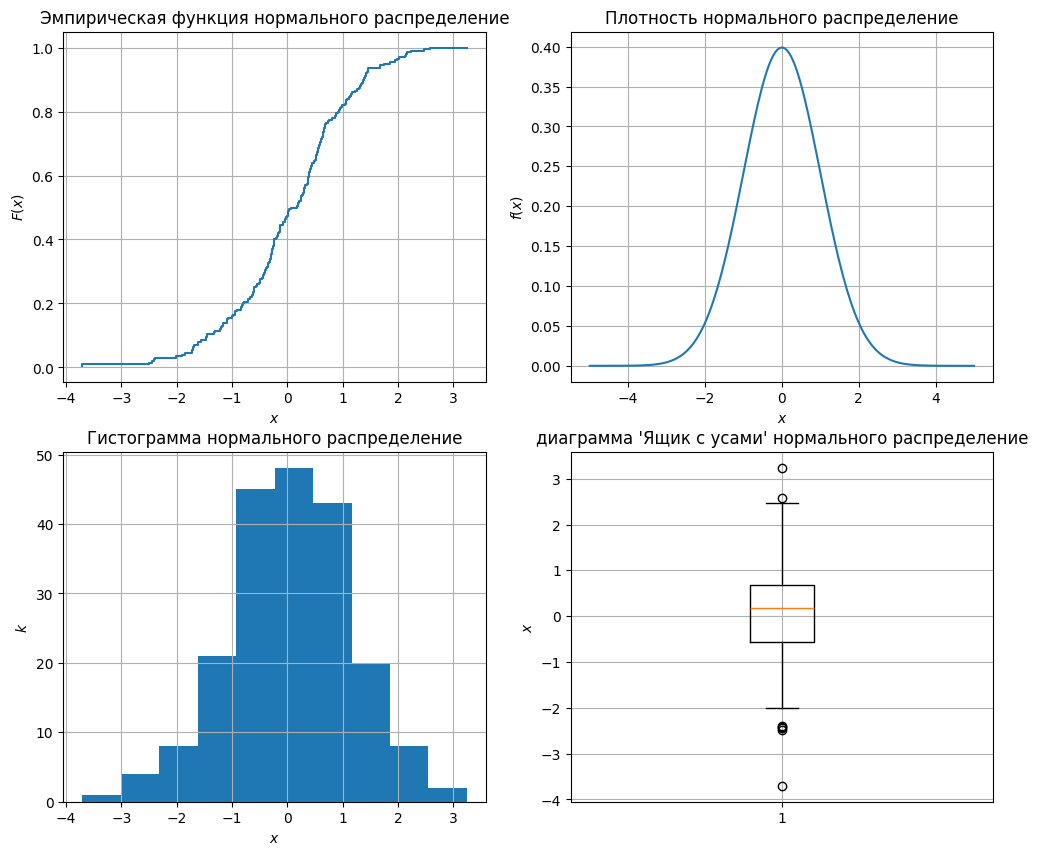

In [45]:
x = np.linspace(-5,5,200)
pdf = normal_distribut.pdf(x)
num = normal_distribut.rvs(size=200)
ecdf = ECDF(num)
name = 'нормального'
graph(x, pdf, num,ecdf,name)

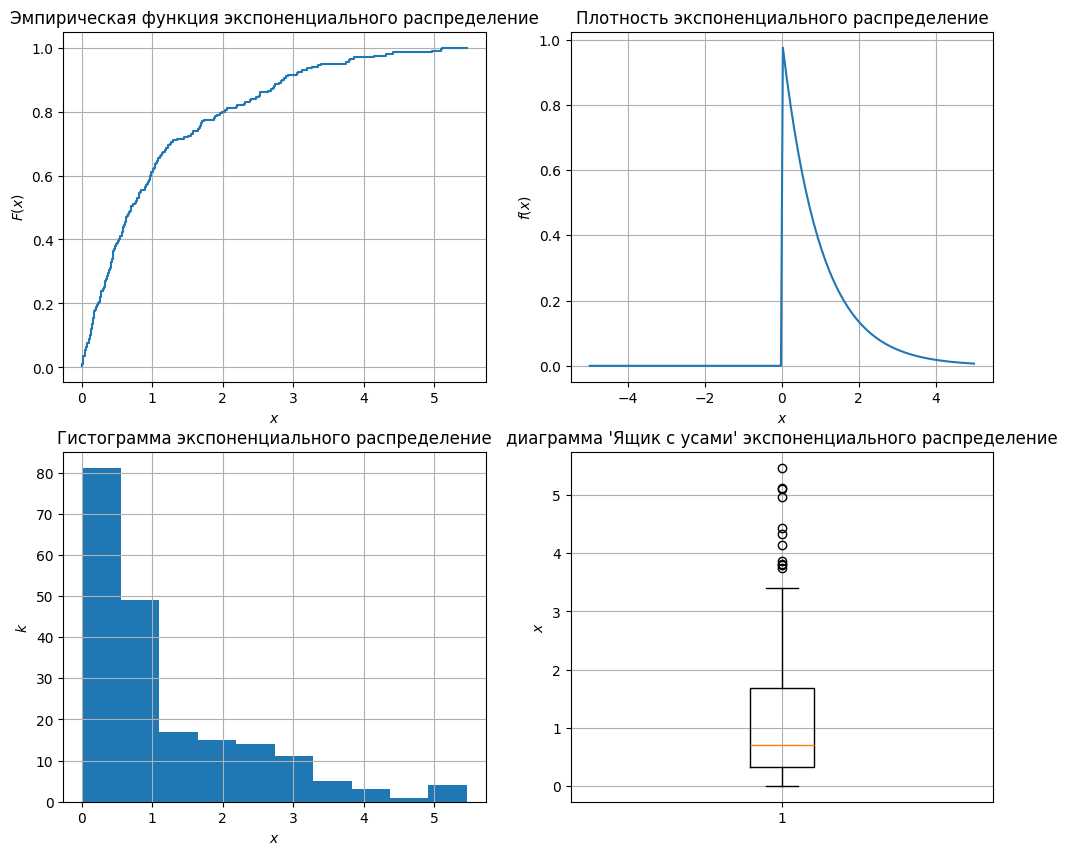

In [46]:
x = np.linspace(-5,5,200)
pdf = expo_distribut.pdf(x)
num = expo_distribut.rvs(size=200)
ecdf = ECDF(num)
name = 'экспоненциального'
graph(x, pdf, num,ecdf,name)

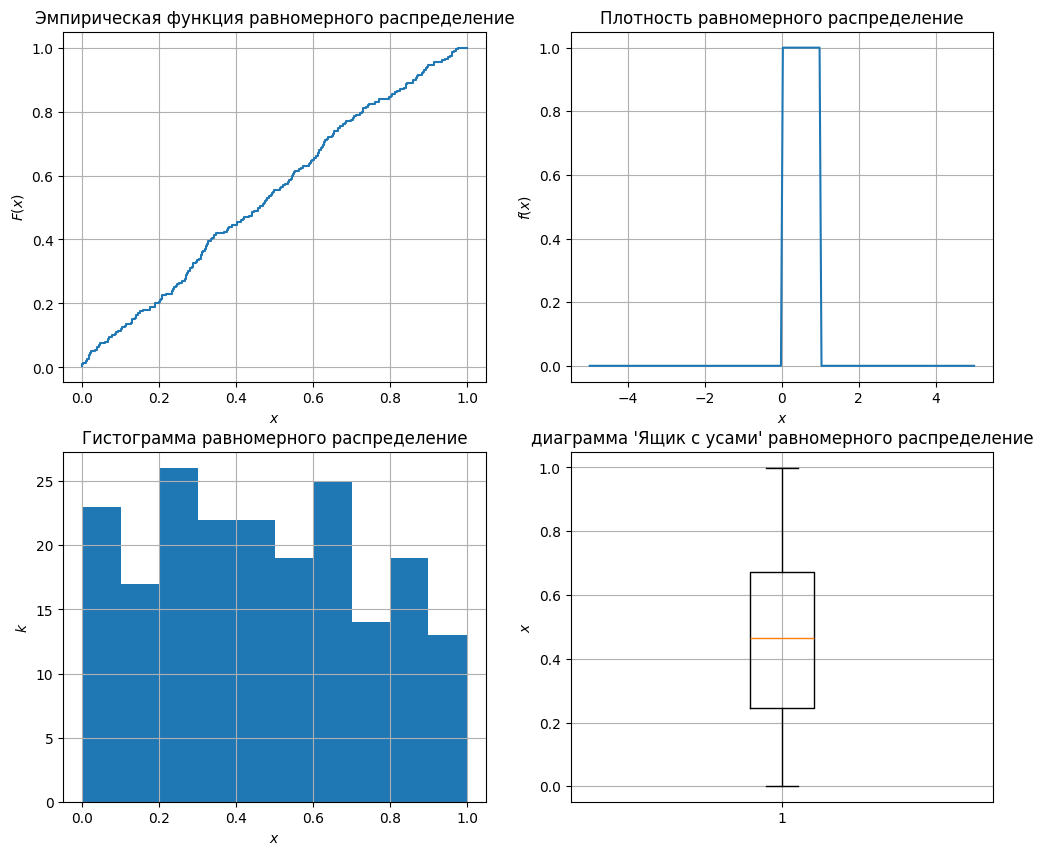

In [47]:
x = np.linspace(-5,5,200)
pdf = unif_distribut.pdf(x)
num = unif_distribut.rvs(size=200)
ecdf = ECDF(num)
name = 'равномерного'
graph(x, pdf, num,ecdf,name)

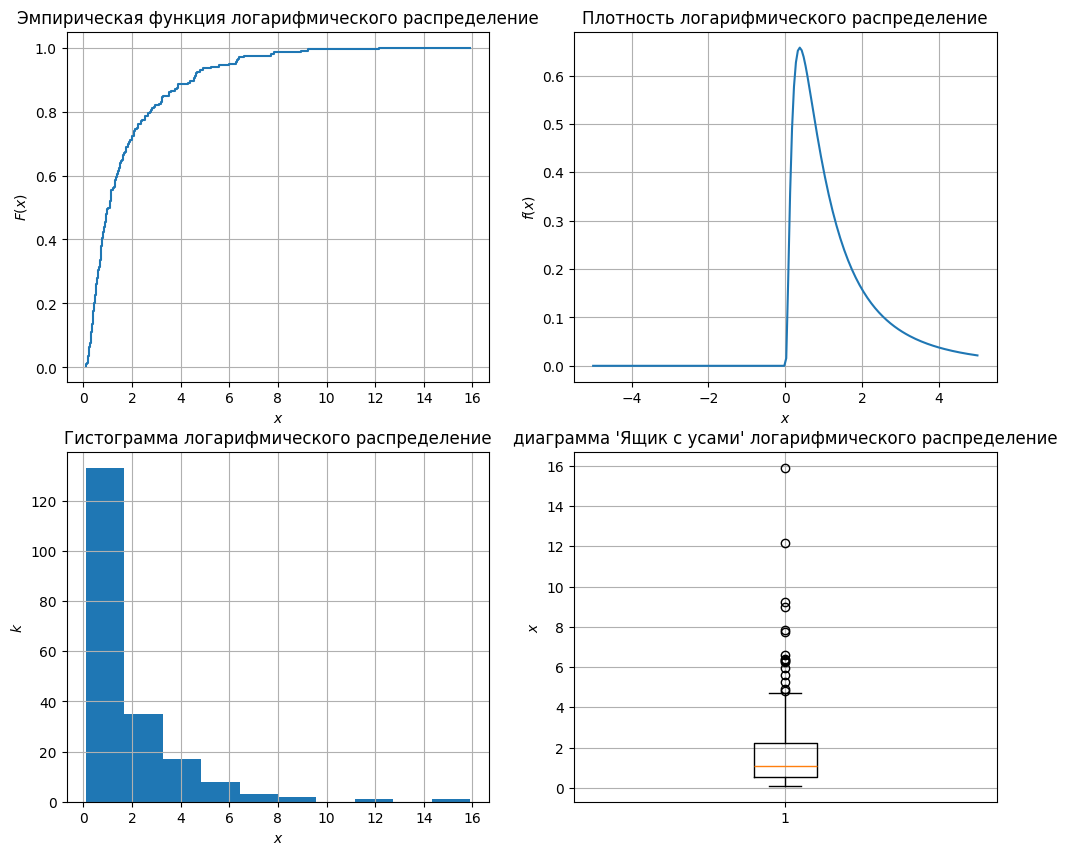

In [48]:
x = np.linspace(-5,5,200)
pdf = logg_distribut.pdf(x)
num = logg_distribut.rvs(size=200)
ecdf = ECDF(num)
name = 'логарифмического'
graph(x, pdf, num,ecdf,name)

## Задание 2

1. Выбрать параметры для нормального распределения. 
2. По 1000 раз смоделировать с выбранными параметрами выборки объема: 10, 50, 100, 1000. 

In [49]:
normal_dist = stats.norm(loc=5, scale=10)

In [50]:
normal_10 = normal_dist.rvs(size=(1000, 10))
mean_10 = [normal.mean() for normal in normal_10]

In [51]:
normal_50 = normal_dist.rvs(size=(1000, 50))
mean_50 = [normal.mean() for normal in normal_50]

In [52]:
normal_100 = normal_dist.rvs(size=(1000, 100))
mean_100 = [normal.mean() for normal in normal_100]

In [53]:
normal_1000 = normal_dist.rvs(size=(1000, 1000))
mean_1000 = [normal.mean() for normal in normal_1000]

3. Построить гистограмму средних. 

In [54]:
def gist(mean, rang):
    plt.figure(figsize=(6,4))
    plt.hist(mean)
    plt.title(f"Гистограмма средний выборок по {rang} элементов")
    plt.ylabel('$k$')
    plt.xlabel('$x$')
    plt.grid()
    plt.show()

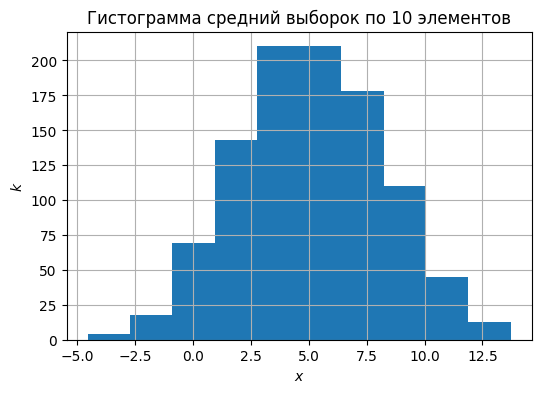

In [55]:
gist(mean_10, 10)

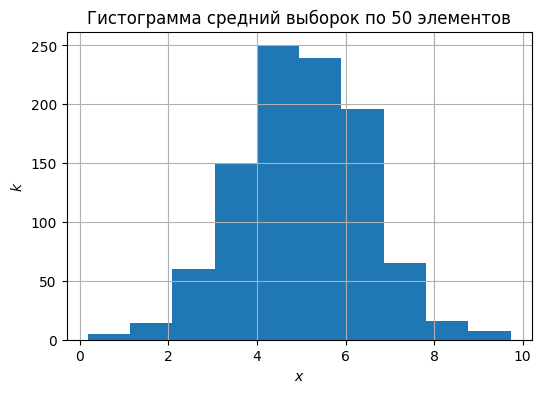

In [56]:
gist(mean_50, 50)

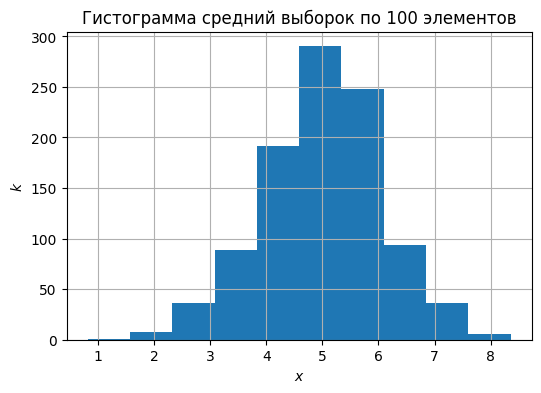

In [57]:
gist(mean_100, 100)

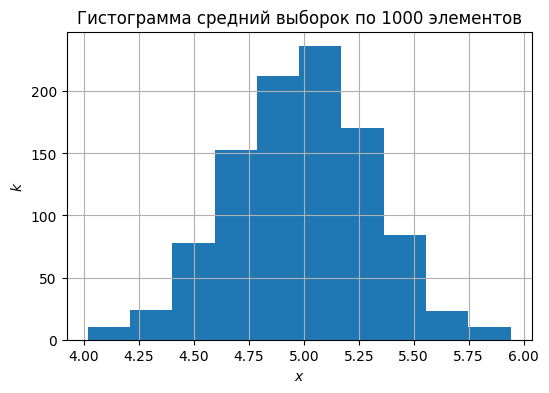

In [58]:
gist(mean_1000, 1000)

4. Посчитать выборочные среднее, стандартное отклонение и коэффициент вариации для каждого объема выборки.

In [59]:
mean = np.mean(mean_10)
std = np.std(mean_10)
cv = std / mean
print('Для выборки объемом 10:\n', mean, std, cv)

Для выборки объемом 10:
 5.099903096645978 3.1090580914871584 0.6096308170113808


In [60]:
mean = np.mean(mean_50)
std = np.std(mean_50)
cv = std / mean
print('Для выборки объемом 50:\n', mean, std, cv)

Для выборки объемом 50:
 5.044407833752146 1.4200173979637374 0.28150328933802643


In [61]:
mean = np.mean(mean_100)
std = np.std(mean_100)
cv = std / mean
print('Для выборки объемом 100:\n', mean, std, cv)

Для выборки объемом 100:
 5.001999178341654 1.0540553668361479 0.21072681726941145


In [62]:
mean = np.mean(mean_1000)
std = np.std(mean_1000)
cv = std / mean
print('Для выборки объемом 1000:\n', mean, std, cv)

Для выборки объемом 1000:
 4.988497855825957 0.3195511437034485 0.06405758866474237


## Задание 3

1. Сгенерируйте выборку из стандартного нормального распределения. 
2. Для каждого 𝑛 постройте эмпирическую функцию распределения 𝐹𝑛 и посчитайте значение статистики
$$𝐷_𝑛 = sup|𝐹_𝑛(𝑥) − 𝐹(𝑥)|$$

In [63]:
normal_dist = stats.norm(loc=0, scale=3)
normal = normal_dist.rvs(size=1000)

In [64]:
def empirical_cdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x)+1) / len(x)
    return x,y

In [65]:
x_empirical, y_empirical = empirical_cdf(normal)
x_teor = np.linspace(min(normal), max(normal), 1000)
y_teor = stats.norm.cdf(x_teor, loc=0, scale=1)
D_n = np.max(np.abs(y_empirical) - stats.norm.cdf(x_empirical))

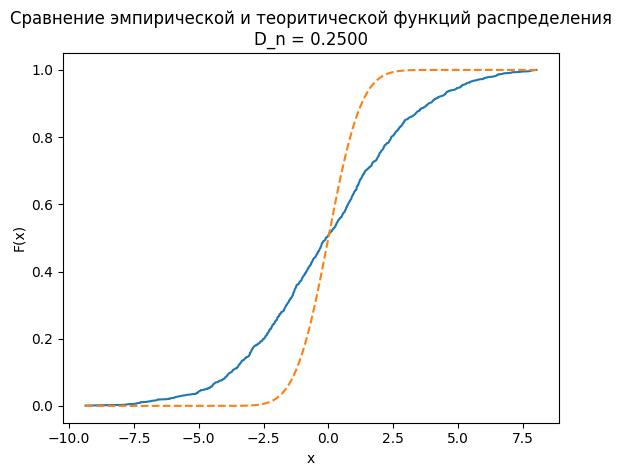

In [66]:
plt.plot(x_empirical, y_empirical, label='Эмпирическая функция распределения')
plt.plot(x_teor, y_teor, label='Теоритическая функция распределения', linestyle='--')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title(f"Сравнение эмпирической и теоритической функций распределения\nD_n = {D_n:.4f}")
plt.show()